In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import json
import re
from pathlib import Path
from mimas.helper.fileio import NumpyEncoder

import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 12
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['svg.fonttype'] = 'none'

path_data = Path().cwd().parent / 'data'

path_figures = Path().cwd().parent / 'figures'
path_figures.mkdir(parents=True, exist_ok=True)


In [2]:
df = pd.read_csv(path_data / "multiple_cores.csv")
df["memory"] = df["memory"]/1024/1024


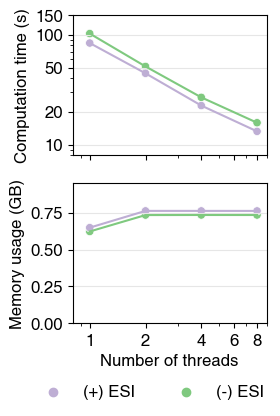

In [3]:
datasource = "mona"
df_plot = df[df["datasource"] == datasource]
df_plot

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(2.5, 4))

#################### Plotting ####################
ax = axes[0]
color_palette = sns.color_palette("Accent", 2)
sns.lineplot(x="cores", y="time", data=df_plot, palette=color_palette, errorbar=None, ax=ax, hue="charge")
sns.scatterplot(x="cores", y="time", data=df_plot, palette=color_palette, ax=ax, hue="charge")

ax.set_xlabel("Number of threads")
ax.set_ylabel("Computation time (s)")

ax.set_xlim(0, 9)
ax.set_ylim(8, 150)

ax.set_yscale("log")
ax.set_xscale("log")

# Set x ticks
ax.set_xticks([2, 4, 6, 8])
ax.set_xticklabels([2, 4, 6, 8])

# Set y ticks
ax.set_yticks([10, 20, 50, 100,  150])
ax.set_yticklabels([10, 20, 50, 100,  150])

# Set legend
handles, labels = ax.get_legend_handles_labels()
legend_dict = {l: h for h, l in zip(handles, labels)}
labels_new = ["Positive spectra", "Negative spectra"]
handles_new = [legend_dict[l] for l in ["P", "N"]]
ax.legend([], [], frameon=False)

# Add grid
ax.grid(True, which="major", axis="y", ls="-", color='0.9')
# ax.legend(handles_new, labels_new, frameon=False, ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.42))

#################### Plotting ####################
ax = axes[1]
sns.lineplot(x="cores", y="memory", data=df_plot, palette=color_palette, errorbar=None, ax=ax, hue="charge")
sns.scatterplot(x="cores", y="memory", data=df_plot, palette=color_palette, ax=ax, hue="charge")

ax.set_xlabel("Number of threads")
ax.set_ylabel("Memory usage (GB)")

ax.set_xlim(0.81, None)
ax.set_ylim(0, 0.95)

# Set x ticks
ax.set_xticks([1, 2, 4, 6, 8])
ax.set_xticklabels([1, 2, 4, 6, 8])

# Set legend
handles, labels = ax.get_legend_handles_labels()
legend_dict = {l: h for h, l in zip(handles, labels)}
labels_new = ["(+) ESI", "(-) ESI"]
handles_new = [legend_dict[l] for l in ["P", "N"]]
ax.legend(handles_new, labels_new, frameon=False, ncol=2, loc="lower center", bbox_to_anchor=(0.4, -0.65))

# Add grid
ax.grid(True, which="major", axis="y", ls="-", color='0.9')

plt.savefig(path_figures / f"30_compare_multiple_cores-{datasource}.svg", bbox_inches='tight', dpi=1200)
